In [1]:
from ppp import PPPPromptManager
from diffusers import StableDiffusionPipeline, EulerAncestralDiscreteScheduler
import torch

model_id = "runwayml/stable-diffusion-v1-5"

pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16).to(
    "cuda:1"
)

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

/home/simo/anaconda3/envs/pytorch_latest/lib/python3.8/site-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


In [63]:
from ppp import overwrite_call
from ppp import PPPAttenProc

pipe.unet.set_attn_processor(PPPAttenProc())

from lora_diffusion import patch_pipe

pm = PPPPromptManager(
    tokenizer=pipe.tokenizer,
    text_encoder=pipe.text_encoder,
    main_token="<yc>",
    preserve_prefix=True,
    extend_amount=1,
)
patch_pipe(pipe, "../yc_coarse_inversion/step_inv_300.safetensors")

Adding new token:  <yc-0-0>
The tokenizer already contains the token <yc-0-0>.
Replacing <yc-0-0> embedding.
Adding new token:  <yc-1-0>
The tokenizer already contains the token <yc-1-0>.
Replacing <yc-1-0> embedding.
Adding new token:  <yc-10-0>
The tokenizer already contains the token <yc-10-0>.
Replacing <yc-10-0> embedding.
Adding new token:  <yc-11-0>
The tokenizer already contains the token <yc-11-0>.
Replacing <yc-11-0> embedding.
Adding new token:  <yc-12-0>
The tokenizer already contains the token <yc-12-0>.
Replacing <yc-12-0> embedding.
Adding new token:  <yc-13-0>
The tokenizer already contains the token <yc-13-0>.
Replacing <yc-13-0> embedding.
Adding new token:  <yc-14-0>
The tokenizer already contains the token <yc-14-0>.
Replacing <yc-14-0> embedding.
Adding new token:  <yc-15-0>
The tokenizer already contains the token <yc-15-0>.
Replacing <yc-15-0> embedding.
Adding new token:  <yc-2-0>
The tokenizer already contains the token <yc-2-0>.
Replacing <yc-2-0> embedding.
A

{'<yc-0-0>': tensor([-1.2435e-02, -1.5659e-02,  3.9954e-02,  1.3008e-02, -1.7283e-02,
         -2.3728e-04, -1.1123e-02,  2.0260e-02,  7.8703e-03, -1.7503e-03,
         -2.3415e-03,  1.5546e-02, -1.0462e-02,  1.0955e-02,  2.0486e-03,
          1.8655e-03, -1.4196e-02, -1.8440e-02, -1.9924e-02,  1.9672e-03,
         -6.2285e-03, -2.7887e-02,  1.4712e-02, -2.2389e-03,  2.3125e-02,
          1.8565e-04, -2.4452e-02, -2.0526e-02, -1.8415e-02,  1.3663e-02,
          1.7030e-03,  1.1380e-02, -2.9884e-02, -1.0040e-02, -3.6007e-03,
         -5.9113e-03, -1.3382e-03,  4.9982e-03,  9.4846e-03, -1.8010e-03,
         -5.0864e-03, -1.1211e-02,  2.8506e-02,  1.1184e-02,  2.1131e-03,
         -3.1766e-02,  9.2311e-04,  1.5516e-02, -1.3594e-02, -1.2068e-02,
         -1.7147e-02,  9.1059e-03,  1.5593e-02,  3.6514e-02, -1.9794e-02,
          2.6509e-03,  8.3825e-03, -9.7031e-03, -1.0913e-02,  4.9351e-03,
         -1.4701e-02, -1.7808e-03,  7.0369e-04,  1.0306e-02,  2.0684e-02,
          1.0174e-02,  1.1

  0%|          | 0/50 [00:00<?, ?it/s]

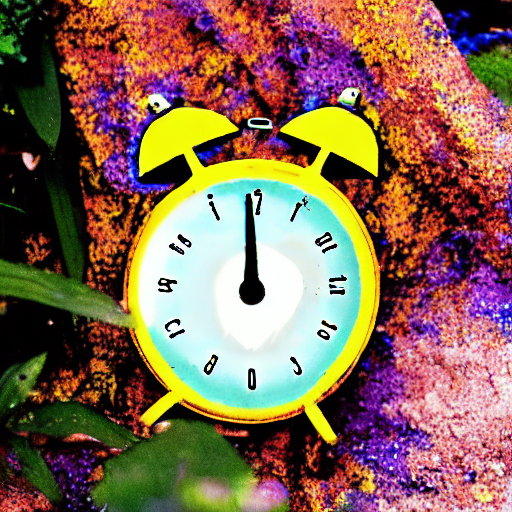

In [64]:
with torch.no_grad():
    ps = pm.embed_prompt("a colorful photo of a <yc> in the jungles")
torch.manual_seed(0)
im = overwrite_call(pipe, prompt_embeds=ps).images[0]  # .save("contents/yc_.jpg")
im.save("contents/yc_eti_coarse.jpg")
im

In [65]:
# check how it expands
pm.expand_prompt("a photo of <yc>")

['a photo of <yc><yc-0-0>',
 'a photo of <yc><yc-1-0>',
 'a photo of <yc><yc-2-0>',
 'a photo of <yc><yc-3-0>',
 'a photo of <yc><yc-4-0>',
 'a photo of <yc><yc-5-0>',
 'a photo of <yc><yc-6-0>',
 'a photo of <yc><yc-7-0>',
 'a photo of <yc><yc-8-0>',
 'a photo of <yc><yc-9-0>',
 'a photo of <yc><yc-10-0>',
 'a photo of <yc><yc-11-0>',
 'a photo of <yc><yc-12-0>',
 'a photo of <yc><yc-13-0>',
 'a photo of <yc><yc-14-0>',
 'a photo of <yc><yc-15-0>']